# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

<b>Ans <br><br></b>
<b>Who is the intended audience of this story? </b><br>
Cybersecurity professionals, data scientists working in cybersecurity, or security analysts focus on anomaly detection and intrusion detection systems to protect their assets from internet threats or try to understand their impact. Also, IT managers or network admins need to understand the importance of anomaly detection and its potential benefits.
<br>
<b>What we are presenting about the data? </b><br>
BETH dataset focuses on DNS-based cyberattacks, which includes 8M datapoints from monitoring 23 honeypots that were running in a cloud environment for five nonconsecutive hours and collected from the OS and cloud infrastructure management. There data is divided into 60-20-20 in Train, Validation, and Test in three different file.
<Br>
Honeypot - A honeypot is intentionally designed to be vulnerable and enticing to attackers. It mimics a real system or service, making it seem like an easy target.

<br>
<b>How we are going to understand the data?</b><br>
There are three files of data labelled_training_data.csv , labelled_testing_data.csv , labelled_validation_data.csv
<br>Below are the 16 columns of the datasets.
<br>
<ol>
<li>timestamp :  Instead of being a time series, this field is considered a sampling distribution.
<li>processId : Id created to identify the process.
<li>threadId : The process call linking method is suggested. 
<li>parentProcessId : ID created to identify the parent process.
<li>userId : The Linux operating system has defined it to allocate the OS activity by default. Per host, a maximum of
four logins were seen in this instance.
<li>mountNamespace : set mounting restrictions this process log works within.
<li>processName : String command executed 
<li>hostName : Name of the host server
<li>eventId : For each eventName, the Linux operating system allocates an eventId.
<li>eventName : Name of the event generating the log
<li>stackAddresses : Memory values relevant to the process
<li>argsNum : Length of Arguments
<li>returnValue : Value returned from this event log ( usually 0)
<li>args : List of arguments passed to this process
<li>sus : Binary label as the suspicious event ( 1 is unsuspicious , 0 is not)
<li>evil : Binary label as known malicious event ( 0 is benign, 1 is not)



# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [3]:
#import os
#os.environ['KAGGLE_CACHE_DIR'] = "c:/Users/kmisra/Downloads/BU_Python_Checks/Spring_2025/beth-dataset/" 
import kagglehub

# Download latest version
path = kagglehub.dataset_download("katehighnam/beth-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kmisra\.cache\kagglehub\datasets\katehighnam\beth-dataset\versions\3


Importing all the training, validation and testing dataset to dataframe.

In [4]:

training_dframe = pd.read_csv('c:/Users/kmisra/Downloads/BU_Python_Checks/Spring_2025/beth-dataset/labelled_training_data.csv')
testing_dframe = pd.read_csv('c:/Users/kmisra/Downloads/BU_Python_Checks/Spring_2025/beth-dataset/labelled_testing_data.csv')
validation_frame = pd.read_csv('c:/Users/kmisra/Downloads/BU_Python_Checks/Spring_2025/beth-dataset/labelled_validation_data.csv')

## Need to do the extra steps for validation and testing dataframe 

Column list for all the three files

In [5]:
training_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763144 entries, 0 to 763143
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        763144 non-null  float64
 1   processId        763144 non-null  int64  
 2   threadId         763144 non-null  int64  
 3   parentProcessId  763144 non-null  int64  
 4   userId           763144 non-null  int64  
 5   mountNamespace   763144 non-null  int64  
 6   processName      763144 non-null  object 
 7   hostName         763144 non-null  object 
 8   eventId          763144 non-null  int64  
 9   eventName        763144 non-null  object 
 10  stackAddresses   763144 non-null  object 
 11  argsNum          763144 non-null  int64  
 12  returnValue      763144 non-null  int64  
 13  args             763144 non-null  object 
 14  sus              763144 non-null  int64  
 15  evil             763144 non-null  int64  
dtypes: float64(1), int64(10), object(5)
me

In [6]:
validation_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188967 entries, 0 to 188966
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        188967 non-null  float64
 1   processId        188967 non-null  int64  
 2   threadId         188967 non-null  int64  
 3   parentProcessId  188967 non-null  int64  
 4   userId           188967 non-null  int64  
 5   mountNamespace   188967 non-null  int64  
 6   processName      188967 non-null  object 
 7   hostName         188967 non-null  object 
 8   eventId          188967 non-null  int64  
 9   eventName        188967 non-null  object 
 10  stackAddresses   188967 non-null  object 
 11  argsNum          188967 non-null  int64  
 12  returnValue      188967 non-null  int64  
 13  args             188967 non-null  object 
 14  sus              188967 non-null  int64  
 15  evil             188967 non-null  int64  
dtypes: float64(1), int64(10), object(5)
me

In [7]:
testing_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188967 entries, 0 to 188966
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        188967 non-null  float64
 1   processId        188967 non-null  int64  
 2   threadId         188967 non-null  int64  
 3   parentProcessId  188967 non-null  int64  
 4   userId           188967 non-null  int64  
 5   mountNamespace   188967 non-null  int64  
 6   processName      188967 non-null  object 
 7   hostName         188967 non-null  object 
 8   eventId          188967 non-null  int64  
 9   eventName        188967 non-null  object 
 10  stackAddresses   188967 non-null  object 
 11  argsNum          188967 non-null  int64  
 12  returnValue      188967 non-null  int64  
 13  args             188967 non-null  object 
 14  sus              188967 non-null  int64  
 15  evil             188967 non-null  int64  
dtypes: float64(1), int64(10), object(5)
me

In [8]:
training_dframe.columns

Index(['timestamp', 'processId', 'threadId', 'parentProcessId', 'userId',
       'mountNamespace', 'processName', 'hostName', 'eventId', 'eventName',
       'stackAddresses', 'argsNum', 'returnValue', 'args', 'sus', 'evil'],
      dtype='object')

In [9]:
validation_frame.columns

Index(['timestamp', 'processId', 'threadId', 'parentProcessId', 'userId',
       'mountNamespace', 'processName', 'hostName', 'eventId', 'eventName',
       'stackAddresses', 'argsNum', 'returnValue', 'args', 'sus', 'evil'],
      dtype='object')

In [10]:
testing_dframe.columns

Index(['timestamp', 'processId', 'threadId', 'parentProcessId', 'userId',
       'mountNamespace', 'processName', 'hostName', 'eventId', 'eventName',
       'stackAddresses', 'argsNum', 'returnValue', 'args', 'sus', 'evil'],
      dtype='object')

In [11]:
training_dframe.describe()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus,evil
count,763144.000000,763144.000000,763144.000000,763144.000000,763144.000000,7.631440e+05,763144.000000,763144.000000,763144.000000,763144.000000,763144.0
mean,1844.582673,6814.763308,6820.265241,1882.216609,2.279034,4.026532e+09,288.158953,2.672082,17.520924,0.001663,0.0
std,1136.638249,1948.871187,1937.068333,2215.563094,37.416576,1.649030e+02,385.117778,1.340906,318.596662,0.040744,0.0
min,132.560721,1.000000,1.000000,0.000000,0.000000,4.026532e+09,3.000000,0.000000,-115.000000,0.000000,0.0
25%,903.250802,7313.000000,7313.000000,187.000000,0.000000,4.026532e+09,3.000000,1.000000,0.000000,0.000000,0.0
50%,1829.203642,7365.000000,7365.000000,1385.000000,0.000000,4.026532e+09,62.000000,3.000000,0.000000,0.000000,0.0
75%,2761.380825,7415.000000,7415.000000,1648.000000,0.000000,4.026532e+09,257.000000,4.000000,4.000000,0.000000,0.0
max,3954.587643,8619.000000,8619.000000,7672.000000,1000.000000,4.026532e+09,1010.000000,5.000000,8289.000000,1.000000,0.0


In [12]:
training_dframe.shape

(763144, 16)

In [13]:
training_dframe.head(10)

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,1809.495787,381,7337,1,100,4026532231,close,ip-10-100-1-120,157,prctl,"[140662171848350, 11649800180280676]",5,0,"[{'name': 'option', 'type': 'int', 'value': 'P...",1,0
1,1809.495832,381,7337,1,100,4026532231,close,ip-10-100-1-120,3,close,[140662171777451],1,0,"[{'name': 'fd', 'type': 'int', 'value': 19}]",1,0
2,1809.495921,381,7337,1,100,4026532231,close,ip-10-100-1-120,1010,sched_process_exit,[],0,0,[],1,0
3,1894.139651,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,21,access,[],2,-2,"[{'name': 'pathname', 'type': 'const char*', '...",1,0
4,1894.142127,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,1005,security_file_open,"[139778263990104, 139778263906698]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",1,0
5,1894.142589,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,257,openat,"[139778263990104, 139778263906698]",4,3,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",1,0
6,1894.142753,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,5,fstat,[],2,0,"[{'name': 'fd', 'type': 'int', 'value': 3}, {'...",1,0
7,1894.143329,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,3,close,[],1,0,"[{'name': 'fd', 'type': 'int', 'value': 3}]",1,0
8,1894.143403,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,1005,security_file_open,"[139778263990104, 139778263906765]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",1,0
9,1894.143855,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,257,openat,"[139778263990104, 139778263906765]",4,3,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",1,0


Let have a look on 10 random sample data

In [14]:
training_dframe.sample(n = 10)

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
705727,1385.069404,7388,7388,7099,0,4026531840,sshd,ip-10-100-1-57,42,connect,[140253858050823],3,-111,"[{'name': 'sockfd', 'type': 'int', 'value': 8}...",0,0
201035,2388.193151,7378,7378,1649,0,4026531840,ps,ip-10-100-1-28,3,close,"[140292478593415, 2048, 3467863110673785953]",1,0,"[{'name': 'fd', 'type': 'int', 'value': 9}]",0,0
499711,132.659540,7263,7263,187,0,4026532217,systemd-udevd,ubuntu,257,openat,[139692889305126],4,15,"[{'name': 'dirfd', 'type': 'int', 'value': 6},...",0,0
668173,3006.175306,7850,7850,188,0,4026532217,systemd-udevd,ubuntu,3,close,[],1,0,"[{'name': 'fd', 'type': 'int', 'value': 15}]",0,0
142096,3198.592736,7388,7388,1469,0,4026531840,ps,ip-10-100-1-173,1005,security_file_open,[],4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
36924,1829.215062,7338,7338,1317,0,4026531840,ps,ip-10-100-1-120,257,openat,[],4,9,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
393474,956.234015,159,159,1,0,4026531840,systemd-journal,ip-10-100-1-57,62,kill,[],2,-1,"[{'name': 'pid', 'type': 'pid_t', 'value': 379...",0,0
622513,1262.788550,7360,7360,187,0,4026532217,systemd-udevd,ubuntu,257,openat,[],4,6,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
475507,684.325368,7298,7298,484,0,4026531840,cron,ip-10-100-1-79,257,openat,[],4,8,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
85079,275.156291,7287,7287,1469,0,4026531840,ps,ip-10-100-1-173,1005,security_file_open,[],4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0


Looks like processId is a random number generated uniquely for the os processes. Which does not have direct meaning with the vulnerability. Same goes to the parentProcessId as its value does not have real value about the vulnerability as it is just the random number of the parent process initiating the child process.

In [15]:
training_dframe['processId'].unique().__len__()

545

In [16]:
training_dframe['processId'].value_counts()

processId
159     20517
1       16318
7373     7575
7371     7530
7374     6663
        ...  
176         1
715         1
1631        1
813         1
7157        1
Name: count, Length: 545, dtype: int64

Lets understand mountNamespace column.

In [17]:
training_dframe['mountNamespace'].value_counts()

mountNamespace
4026531840    567496
4026532217    189292
4026532232      3398
4026532229      1208
4026532231      1148
4026532288       602
Name: count, dtype: int64

In [18]:

import random
import string

def generate_random_password(length):
    characters = string.ascii_letters + string.digits + string.punctuation  # Include letters, digits, and punctuation
    password = ''.join(random.choice(characters) for i in range(length))
    return password

password = generate_random_password(14)
print(password)

oy0FSOW(='rXiN


In [19]:
copy_training_dframe =  training_dframe.copy()
copy_training_dframe.drop(columns='processId',inplace=True)
copy_training_dframe.drop(columns='parentProcessId',inplace=True)

In [20]:
copy_training_dframe.duplicated().sum()

0

As per the bleow output there is no null values in all the coumns in this dataframe.

In [21]:
training_dframe.isna().sum(axis=0)

timestamp          0
processId          0
threadId           0
parentProcessId    0
userId             0
mountNamespace     0
processName        0
hostName           0
eventId            0
eventName          0
stackAddresses     0
argsNum            0
returnValue        0
args               0
sus                0
evil               0
dtype: int64

As per the below output there is no duplicate records in the dataframe.

In [22]:
training_dframe.duplicated(keep=False).sum()

0

Let we re of analyzing the hostName col

In [23]:
training_dframe['hostName'].value_counts()

hostName
ubuntu             190500
ip-10-100-1-57     162378
ip-10-100-1-120     95747
ip-10-100-1-28      75648
ip-10-100-1-55      75208
ip-10-100-1-173     74593
ip-10-100-1-34      73295
ip-10-100-1-79      15775
Name: count, dtype: int64

<b>One hot encoding on Hostname Column

In [24]:
categorical_columns = ['hostName']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(training_dframe[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([training_dframe, one_hot_df], axis=1)

In [30]:
df_encoded.head(10)

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,...,sus,evil,hostName_ip-10-100-1-120,hostName_ip-10-100-1-173,hostName_ip-10-100-1-28,hostName_ip-10-100-1-34,hostName_ip-10-100-1-55,hostName_ip-10-100-1-57,hostName_ip-10-100-1-79,hostName_ubuntu
0,1809.495787,381,7337,1,100,4026532231,close,ip-10-100-1-120,157,prctl,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1809.495832,381,7337,1,100,4026532231,close,ip-10-100-1-120,3,close,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1809.495921,381,7337,1,100,4026532231,close,ip-10-100-1-120,1010,sched_process_exit,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1894.139651,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,21,access,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1894.142127,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,1005,security_file_open,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1894.142589,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,257,openat,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1894.142753,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,5,fstat,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1894.143329,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,3,close,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1894.143403,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,1005,security_file_open,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1894.143855,7347,7347,7341,0,4026531840,sh,ip-10-100-1-120,257,openat,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Lets looks into the distribution of data of the dataset.
<br>
It gives the idea BETH dataset and how it is collected. It gives really good information about the whole dataset.
<br>
<b>
- Summarize the datasets using info() and describe()
</b>
<br>Already did the info and Describe.

<b>
<br>- Are there any duplicate rows?
</b>
<br>We already searched and no duplicate rows.

<br><b>
- Are there any duplicate values in a given column (when this would be inappropriate?)
</b>
<br>There are duplicate values on the some columns like hostname, argument number as they are categorical data.
<br>I have created histogram below for this.
<b>
- What are the mean, median, and mode of each column?
<br></b>
Already performed on the top.
<br>
<b>
<br>
- Are there any missing or null values?
</b>
<br>There is no missing data as there is no null values
<br>
<b>
    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?
</b><br>
Not required as no missing values.

<b><br>
- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)
</b><br>
Not applicable.

<b><br>
- Encode any categorical variables (e.g. with one-hot encoding.)
</b><br>
<b>
### Conclusions:
<b>
- Are the data usable?  If not, find some new data!
</b>
<br>Yes the data is useable.
<b>
<br>
- Do you need to modify or correct the data in some way?
</b>
<br>
Not required.
<b>
<br>
- Is there any class imbalance?  (Categories that have many more items than other categories).
</b>
<br>
I dont see any class imbalance.
<b>
<br>

array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'processId'}>,
        <Axes: title={'center': 'threadId'}>],
       [<Axes: title={'center': 'parentProcessId'}>,
        <Axes: title={'center': 'userId'}>,
        <Axes: title={'center': 'mountNamespace'}>],
       [<Axes: title={'center': 'eventId'}>,
        <Axes: title={'center': 'argsNum'}>,
        <Axes: title={'center': 'returnValue'}>],
       [<Axes: title={'center': 'sus'}>,
        <Axes: title={'center': 'evil'}>, <Axes: >]], dtype=object)

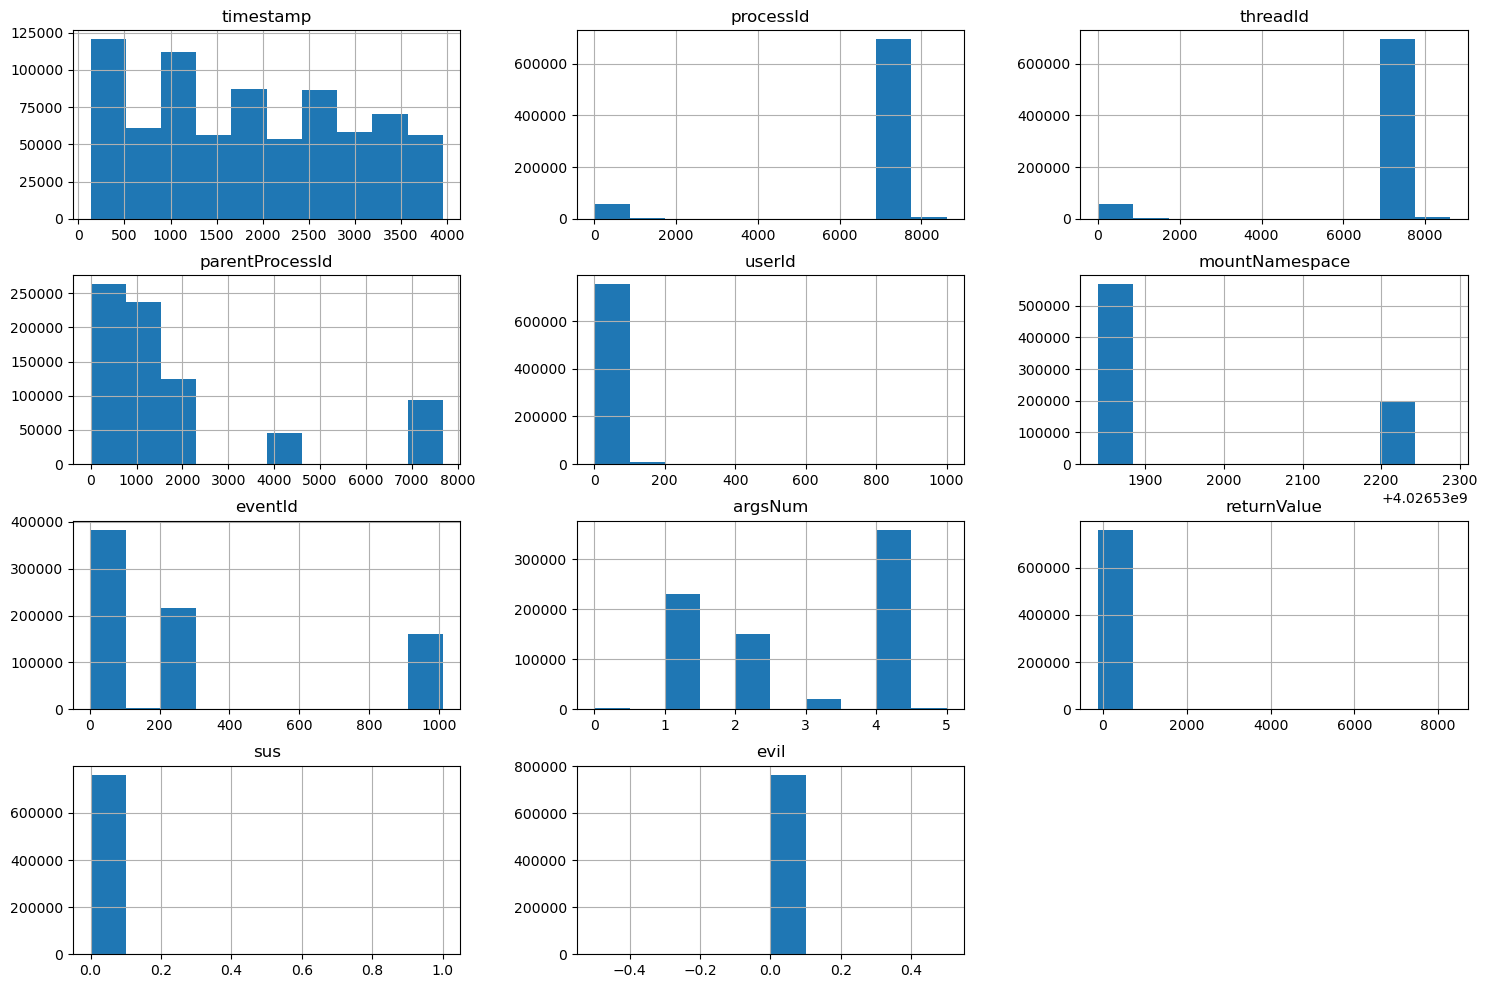

In [25]:
training_dframe.hist(figsize=(18,12))

In [26]:
for x in training_dframe.columns:
    if len(training_dframe[x].unique()) < 20 :
        print(x , training_dframe[x].unique())

userId [ 100    0  103  101  102 1000  109]
mountNamespace [4026532231 4026531840 4026532288 4026532232 4026532229 4026532217]
hostName ['ip-10-100-1-120' 'ip-10-100-1-173' 'ip-10-100-1-28' 'ip-10-100-1-34'
 'ip-10-100-1-55' 'ip-10-100-1-57' 'ip-10-100-1-79' 'ubuntu']
argsNum [5 1 0 2 4 3]
sus [1 0]
evil [0]


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

I have created the Figure 0.3 Example 1(after): storytelling with data

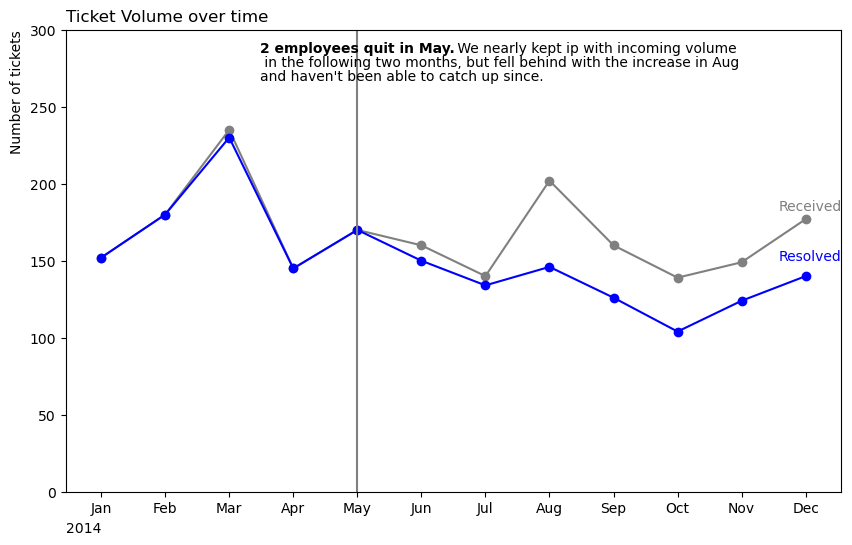

In [27]:
months = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
XYZ_Tickets = pd.DataFrame(months)
XYZ_Tickets.columns = ['Month']
XYZ_Tickets['Received'] = pd.DataFrame([152,180,235,145,170,160,140,202,160,139,149,177])
XYZ_Tickets['Processed'] = pd.DataFrame([152,180,230,145,170,150,134,146,126,104,124,140])
XYZ_Tickets

plt.figure(figsize=(10,6))
plt.plot(XYZ_Tickets['Month'],XYZ_Tickets['Received'],marker='o',color='gray')
plt.plot(XYZ_Tickets['Month'],XYZ_Tickets['Processed'],marker='o',color='blue')
plt.axvline(x='May', color='grey', linestyle='-', label='May Event')
plt.ylim(0,300)
plt.text(0.25, 0.95, "2 employees quit in May. ", fontweight='bold',transform=plt.gca().transAxes)
plt.text(0.50, 0.95, " We nearly kept ip with incoming volume ", transform=plt.gca().transAxes)
plt.text(0.25, 0.92, " in the following two months, but fell behind with the increase in Aug ", transform=plt.gca().transAxes)
plt.text(0.25, 0.89, "and haven't been able to catch up since.", transform=plt.gca().transAxes)
plt.text(0.92, 0.61, "Received",  color='grey',transform=plt.gca().transAxes)
plt.text(0.92, 0.50, "Resolved", color='blue', transform=plt.gca().transAxes)
plt.xlabel("2014",loc='left')
plt.ylabel("Number of tickets",loc='top')
plt.title("Ticket Volume over time",loc='left')
plt.show()

In [28]:
#plt.figure(figsize=(10, 6))
#plt.bar(dframe['argsNum'].value_counts().index, dframe['argsNum'].value_counts().values)

#plt.scatter(dframe['argsNum'])
#plt.show()

filtered_reow = training_dframe[training_dframe['sus'] == 1]
for x in filtered_reow.columns:
    if len(filtered_reow[x].unique()) < 20 :
        name_counts = filtered_reow[x].value_counts()
        dframe_counts = training_dframe[x].value_counts()
        print(x)
        print(name_counts)
        print(dframe_counts)


parentProcessId
parentProcessId
1       1038
7347      18
7340      18
7352      18
7382      18
7389      18
7437      18
7304      18
7341      15
7334      15
7346      15
7376      15
7383      15
7431      15
7298      15
Name: count, dtype: int64
parentProcessId
187     122435
7099     66480
1        62399
1469     62274
188      59649
         ...  
7143         1
7158         1
7152         1
7141         1
7147         1
Name: count, Length: 205, dtype: int64
userId
userId
1000    996
0       237
100      36
Name: count, dtype: int64
userId
0       754907
101       3398
109       1476
102       1208
100       1148
1000       996
103         11
Name: count, dtype: int64
mountNamespace
mountNamespace
4026531840    1233
4026532231      36
Name: count, dtype: int64
mountNamespace
4026531840    567496
4026532217    189292
4026532232      3398
4026532229      1208
4026532231      1148
4026532288       602
Name: count, dtype: int64
processName
processName
systemd      992
sh         

returnValue
 0       526690
 9       106839
 6        31310
 15       23848
-2        20207
          ...  
 7478         1
 7479         1
 7480         1
 7481         1
 7673         1
Name: count, Length: 524, dtype: int64

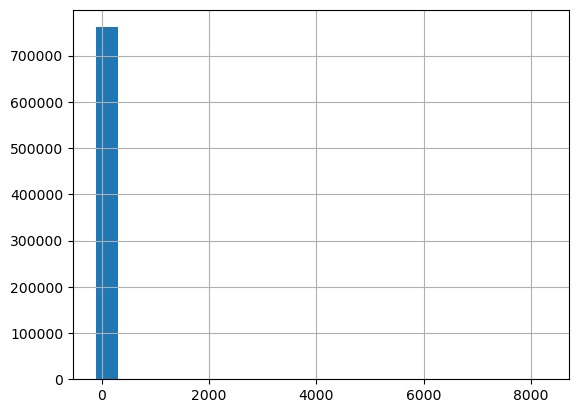

In [29]:
training_dframe['returnValue'].hist(bins=20)
training_dframe['returnValue'].value_counts()